In [1]:
import itertools
import re
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import squarify

from baseline.config import STOP_WORDS

In [2]:
# load PR Newswire Annotated Dataset
pr_newswire = pd.read_csv("../data/pr-newswire.csv")

In [3]:
raw_news_stories = pr_newswire["data"]

# Establish data and target for vectorization
stories = raw_news_stories
classifications = list(pr_newswire["target"])

In [4]:
predictions = []
for story in list(stories):
    classification = []
    if "cash dividend" in story:
        classification.append("cash-dividend")
    if "stock split" in story:
        classification.append("stock-split")
    if "merger" in story or "acquisition" in story:
        classification.append("merger-acquisition")   
    if "equity offering" in story:
        classification.append("equity-offering")
    if "bankruptcy" in story:
        classification.append("bankruptcy")   
    
    if len(classification) == 1:
        prediction = classification[0]
    else:
        prediction = "ambiguous"
        
    predictions.append(prediction)


In [5]:
# Calculate Correct Classifications
correct_values = sum(
    1 for cls, pred in zip(classifications, predictions) if cls == pred
)

# Total Values
total_values = len(classifications)

# Accuracy
print(f"Accuracy Score: {correct_values / total_values}")

Accuracy Score: 0.5233333333333333


In [6]:
def text_cleaning(text: str):
    """Cleans raw text input for Doc2Vec."""    
    # Strip punctuation and special chars
    stripped = re.sub(r"[^\w]", " ", text)
    
    # Tokenize and stem words
    tokenized = [
        token.lower() for token in stripped.split(" ")
        if token.strip() and token.lower() not in STOP_WORDS and len(token) >= 2
    ]
    
    return tokenized

In [7]:
# Join all cleaned stories
stories = itertools.chain.from_iterable(
    list(map(text_cleaning, raw_news_stories))  
)

In [8]:
most_common = dict(Counter(stories).most_common(50))

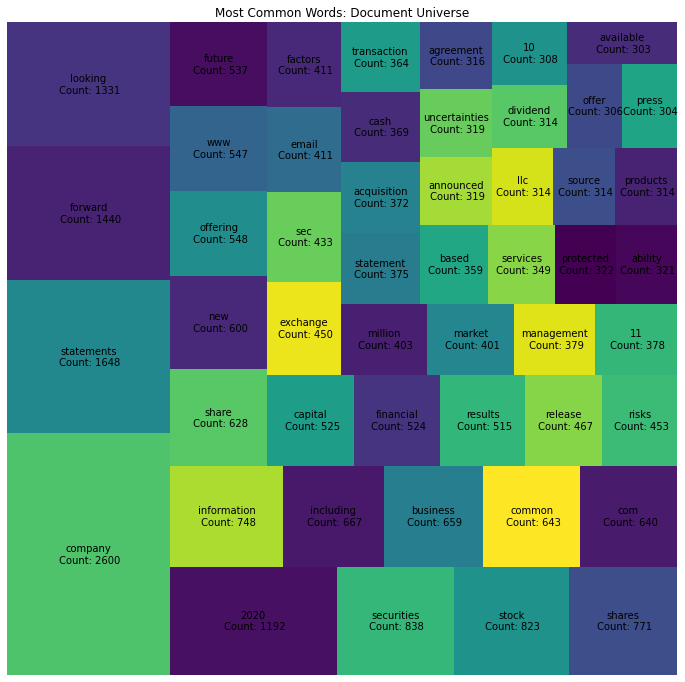

In [9]:
# Most common words in document universe (greater than 1 character)
plt.figure(figsize=(12, 12))
counts = most_common.values()
labels = [(word + f"\n Count: {most_common.get(word)}") for word in most_common.keys()]
squarify.plot(sizes=counts, label=labels)
plt.axis('off')
plt.title("Most Common Words: Document Universe")
plt.savefig("universe-word-frequency-tree-map.png")
plt.show()

In [10]:
# Most common words in cocument by class label
by_class = {
    "cash-dividend": Counter(),
    "merger-acquisition": Counter(),
    "bankruptcy": Counter(),
    "stock-split": Counter(),
    "equity-offering": Counter()
}

for idx, document in enumerate(raw_news_stories):
    class_label = classifications[idx]
    by_class[class_label] = (
        by_class[class_label] + Counter(text_cleaning(document))
    )
    

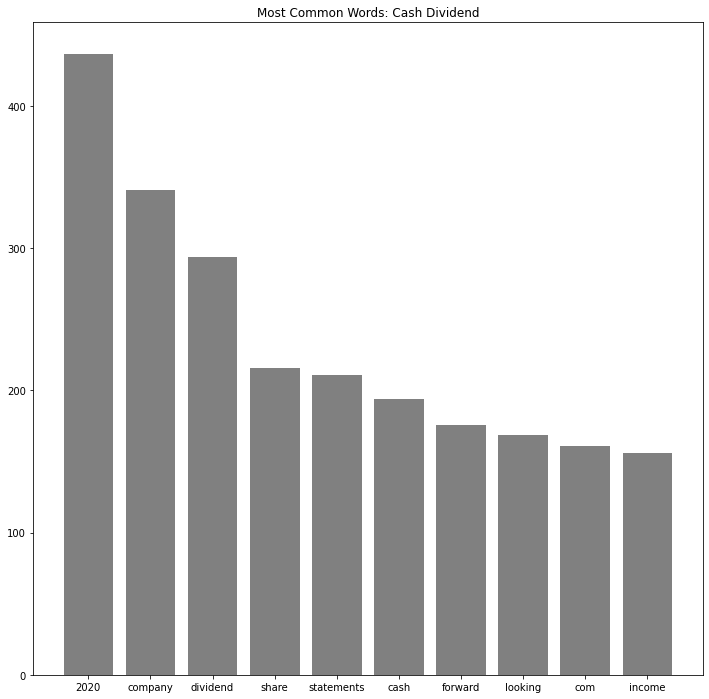

In [11]:
# Most common words in cash-dividend document universe (greater than 1 character)
cash_dividend = dict(by_class.get("cash-dividend").most_common(10))

plt.figure(figsize=(12, 12))
plt.bar(range(len(cash_dividend)), list(cash_dividend.values()), align='center', color='gray')
plt.xticks(range(len(cash_dividend)), list(cash_dividend.keys()))
plt.title("Most Common Words: Cash Dividend")
plt.savefig("cash-dividend-word-frequency.png")
plt.show()

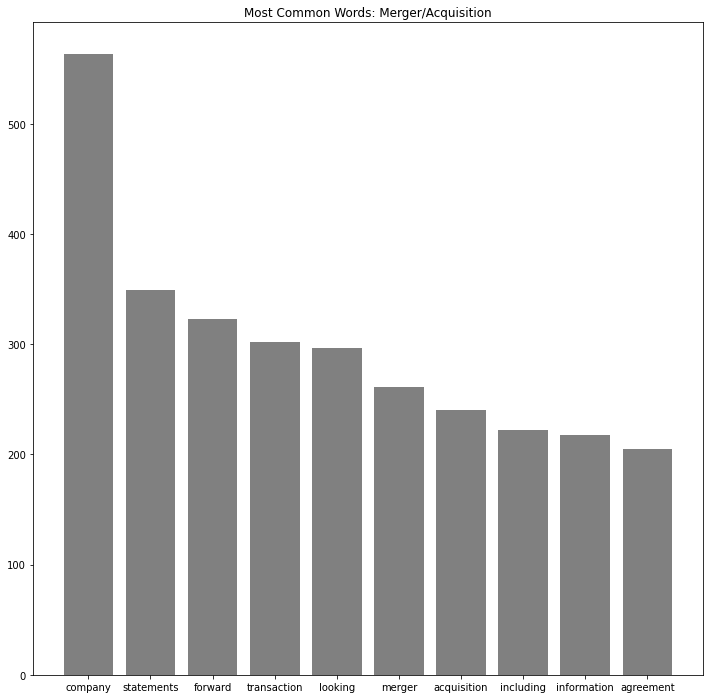

In [12]:
# Most common words in merger-acquisition document universe (greater than 1 character)
merger_acquisition = dict(by_class.get("merger-acquisition").most_common(10))

plt.figure(figsize=(12, 12))
plt.bar(range(len(merger_acquisition)), list(merger_acquisition.values()), align='center', color='gray')
plt.xticks(range(len(merger_acquisition)), list(merger_acquisition.keys()))
plt.title("Most Common Words: Merger/Acquisition")
plt.savefig("merger-acquisition-word-frequency.png")
plt.show()

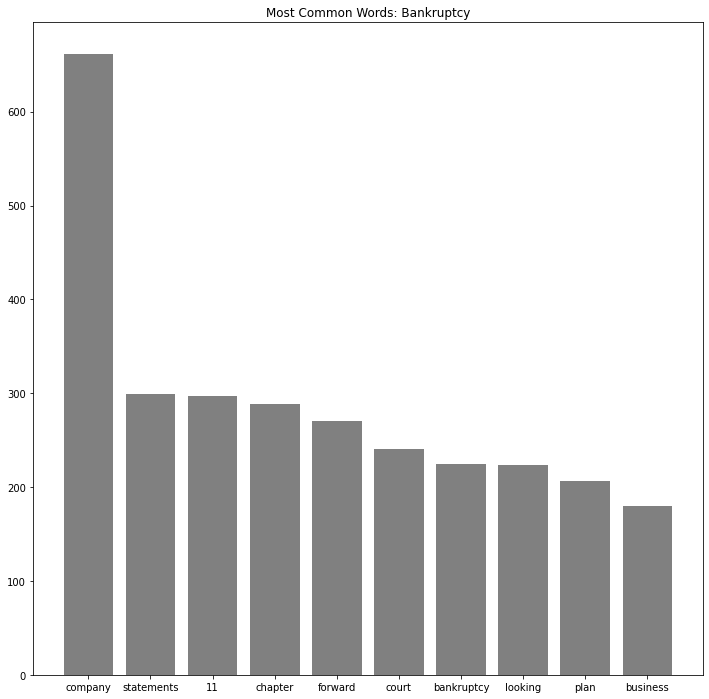

In [13]:
# Most common words in bankruptcy document universe (greater than 1 character)
bankruptcy = dict(by_class.get("bankruptcy").most_common(10))

plt.figure(figsize=(12, 12))
plt.bar(range(len(bankruptcy)), list(bankruptcy.values()), align='center', color='gray')
plt.xticks(range(len(bankruptcy)), list(bankruptcy.keys()))
plt.title("Most Common Words: Bankruptcy")
plt.savefig("bankruptcy-word-frequency.png")
plt.show()

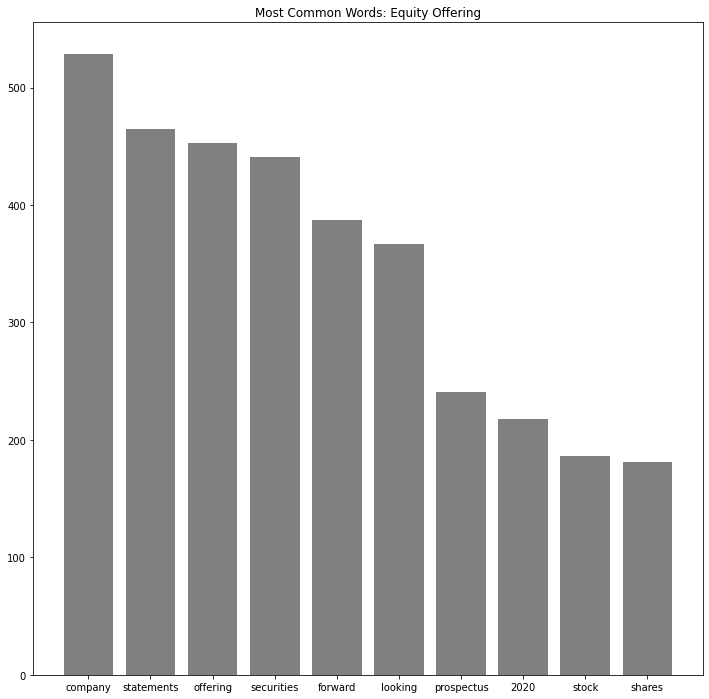

In [14]:
# Most common words in equity-offering document universe (greater than 1 character)
equity_offering = dict(by_class.get("equity-offering").most_common(10))

plt.figure(figsize=(12, 12))
plt.bar(range(len(equity_offering)), list(equity_offering.values()), align='center', color='gray')
plt.xticks(range(len(equity_offering)), list(equity_offering.keys()))
plt.title("Most Common Words: Equity Offering")
plt.savefig("equity-offering-word-frequency.png")
plt.show()

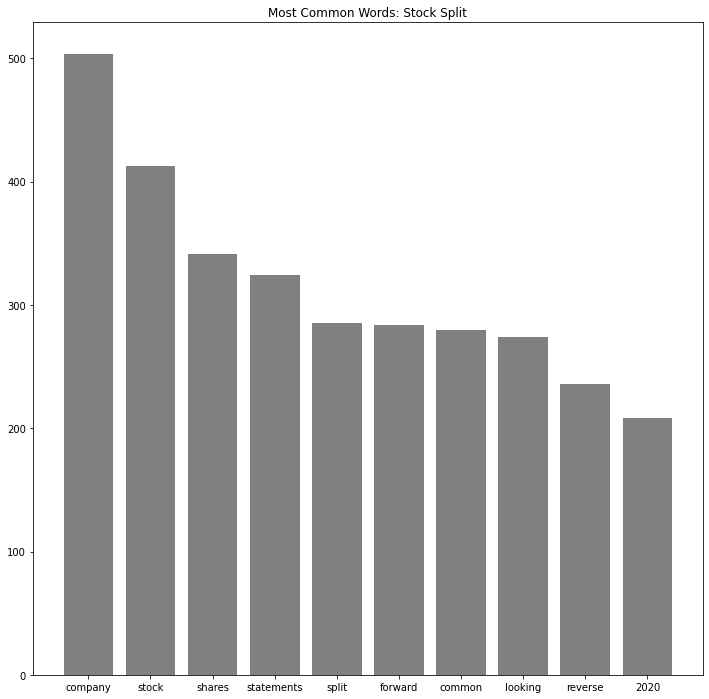

In [15]:
# Most common words in stock-split document universe (greater than 1 character)
stock_split = dict(by_class.get("stock-split").most_common(10))

plt.figure(figsize=(12, 12))
plt.bar(range(len(stock_split)), list(stock_split.values()), align='center', color='gray')
plt.xticks(range(len(stock_split)), list(stock_split.keys()))
plt.title("Most Common Words: Stock Split")
plt.savefig("stock-split-word-frequency.png")
plt.show()